# **Classification of Personal Loan Acceptance**

## **Introduction**

In this project, I aim to build a machine learning model to predict whether a customer will accept a personal loan offer based on their demographic, financial, and behavioral attributes. Accurately predicting loan acceptance can provide actionable insights to enhance targeted marketing strategies and improve overall decision-making processes.

### **Dataset Overview**

The dataset consists of **5,000 customer records**, with each record containing the following information:
- **Demographic Attributes**: Age, ZIP Code, Family size, etc.
- **Financial Attributes**: Annual income, average credit card spending, mortgage value, etc.
- **Behavioral Attributes**: Usage of online banking, securities accounts, and credit cards.

The target variable, `Personal Loan`, indicates whether a customer accepted the loan offer:
- **0**: Did not accept the loan.
- **1**: Accepted the loan.

**Key Observations:**
- Only **9.6% of customers** accepted the loan, making this a slightly imbalanced dataset.

### **Project Objectives**
The primary objective of this project is to:
1. **Develop a machine learning model** that can predict loan acceptance accurately.
2. **Uncover customer insights** that can inform targeted campaigns and marketing strategies.
3. **Provide actionable recommendations** to optimize decision-making.

### **Project Workflow**
The analysis is divided into the following steps:

1. ### **Understanding and Preparing Customer Data**
   - Cleaning and preprocessing the dataset to ensure all variables are in the correct format.
   - Checking for missing values, duplicates, and inconsistencies.

2. ### **Exploring Customer Insights and Loan Acceptance Patterns**
   - Performing Exploratory Data Analysis (EDA) to uncover trends, patterns, and relationships within the data.
   - Visualizing key variables to identify their impact on loan acceptance.

3. ### **Feature Optimization for Loan Prediction**
   - Engineering new features and transforming existing ones to enhance model performance.
   - Handling data imbalance and normalizing variables as needed.

4. ### **Building and Evaluating Loan Classification Models**
   - Training and testing multiple machine learning models to find the best-performing one.
   - Evaluating models using metrics such as accuracy, precision, recall, and F1-score.

5. ### **Key Insights and Recommendations**
   - Summarizing findings and providing actionable insights based on the analysis.
   - Offering recommendations for leveraging these insights to improve business outcomes.


In [27]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
# import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
# import graphviz 

In [28]:
# load the dataset
file_path = 'C:\\Users\\hjmarcel\\OneDrive - Gestion immobiliere BTB Inc\\Bureau\\Personal-Bank-Loan\\Data\\bank_loan.csv'
bank_data = pd.read_csv(file_path)

# Display the structure and first few rows of the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


# **Understanding and Preparing Customer Data**

### Overview
Before diving into analysis, it’s crucial to ensure the dataset is clean and well-structured. In this section, I performed the following steps:
1. Check for missing values to ensure completeness.
2. Handle any duplicates, although unlikely in this dataset due to unique customer IDs.
3. Verify consistency of categorical variables to ensure they fall within expected ranges.
4. Convert non-numeric columns (e.g., `CCAvg`) into usable numeric formats.

These steps ensure the dataset is ready for exploratory analysis and modeling.

In [29]:
# Check for missing values
print("Checking for missing values:")
print(bank_data.isnull().sum())

# Output: No missing values found

# Check for duplicate rows
print("Checking for duplicates:")
duplicates = bank_data[bank_data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Verify consistency of categorical variables
print("Verifying categorical variable ranges:")
expected_ranges = {
    'Education': [1, 2, 3],
    'Family': [1, 2, 3, 4],
    'Personal Loan': [0, 1],
    'Securities Account': [0, 1],
    'CD Account': [0, 1],
    'Online': [0, 1],
    'CreditCard': [0, 1]
}

for column, expected in expected_ranges.items():
    unexpected = bank_data[~bank_data[column].isin(expected)][column].unique()
    if len(unexpected) > 0:
        print(f"Inconsistent values found in {column}: {unexpected}")
    else:
        print(f"{column}: All values are consistent.")

# Convert CCAvg from string format to numeric
print("Converting 'CCAvg' to numeric format:")
def convert_ccavg(value):
    if isinstance(value, str) and '/' in value:
        return float(value.replace('/', '.'))
    return value

bank_data['CCAvg'] = bank_data['CCAvg'].apply(convert_ccavg)

# Confirm conversion
print("Sample values in 'CCAvg':")
print(bank_data['CCAvg'].head())


Checking for missing values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Checking for duplicates:
Number of duplicate rows: 0
Verifying categorical variable ranges:
Education: All values are consistent.
Family: All values are consistent.
Personal Loan: All values are consistent.
Securities Account: All values are consistent.
CD Account: All values are consistent.
Online: All values are consistent.
CreditCard: All values are consistent.
Converting 'CCAvg' to numeric format:
Sample values in 'CCAvg':
0    1.6
1    1.5
2    1.0
3    2.7
4    1.0
Name: CCAvg, dtype: float64


### **Data Cleaning Summary**
- Verified no missing values in the dataset.
- Confirmed no duplicate rows, as expected for a dataset with unique customer IDs.
- Ensured all categorical variables were consistent with their expected ranges.
- Converted the `CCAvg` column from string format to numeric for analysis.
- The dataset is now clean and ready for exploratory data analysis.


# **Exploring Customer Insights and Loan Acceptance Patterns (EDA)**

## Step 1: Analyzing Distributions of Numeric Variables

### Overview
In this step, I examined the distributions of key numeric variables in the dataset to:
- Understand their range and central tendencies.
- Identify patterns, skewness, and potential outliers.

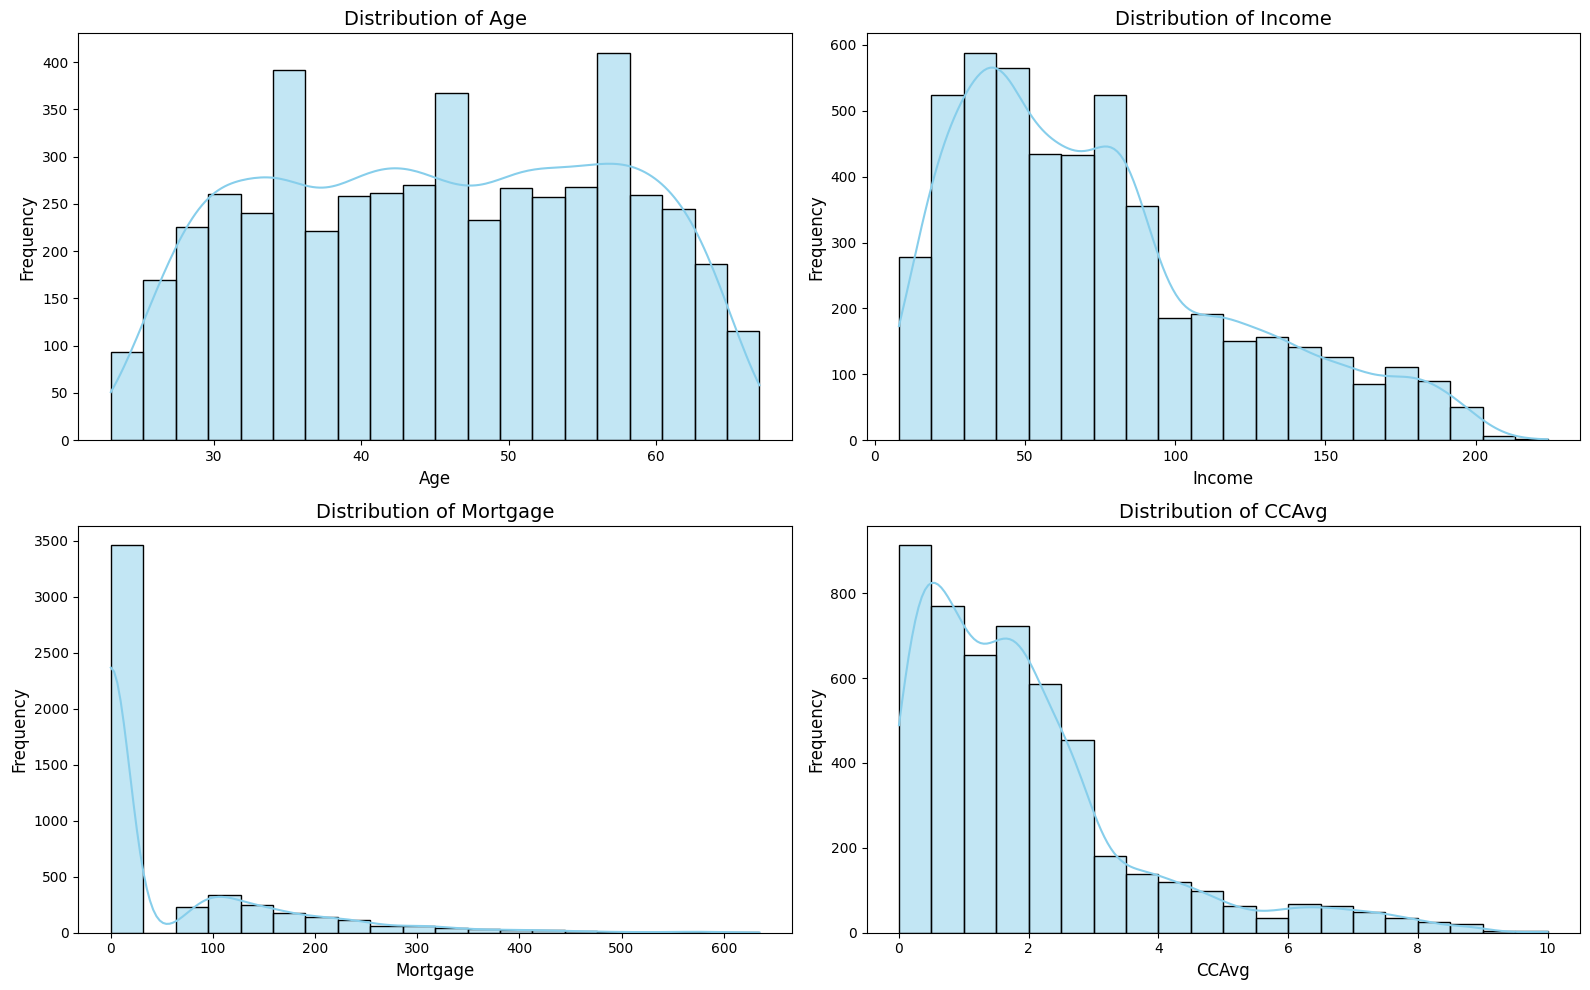

In [30]:
# Plot histograms for key numeric variables
numeric_columns = ['Age', 'Income', 'Mortgage', 'CCAvg']
plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(bank_data[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


### Variables Analyzed
1. **Age**: The age of the customer.
2. **Income**: The annual income of the customer (in $1000).
3. **Mortgage**: The value of the house mortgage (if any).
4. **CCAvg**: The average monthly spending on credit cards (in $1000).

### Key Observations
1. **Age**:
   - The distribution is approximately normal, with most customers aged between 30 and 60.
   - No significant outliers were detected.

2. **Income**:
   - The data is right-skewed, with most customers earning under $100k annually.
   - A few customers have significantly higher incomes, which could represent outliers.

3. **Mortgage**:
   - Most customers have no mortgage, as shown by a strong peak at 0.
   - A long tail indicates a small number of customers with very high mortgage values.

4. **CCAvg**:
   - The distribution is skewed toward lower values, with most customers spending less than $5k monthly on average.

---

With these insights, there is a clearer understanding of the dataset's numeric attributes. In the next step, I will explore how these variables relate to the target variable, **Personal Loan**.

## Step 2: Exploring Relationships Between Predictors and the Target (`Personal Loan`)

### Overview
In this step, I will analyze the relationships between predictors (categorical and numeric variables) and the target variable, `Personal Loan`. The goal is to uncover trends and patterns that could indicate which factors influence loan acceptance.

---

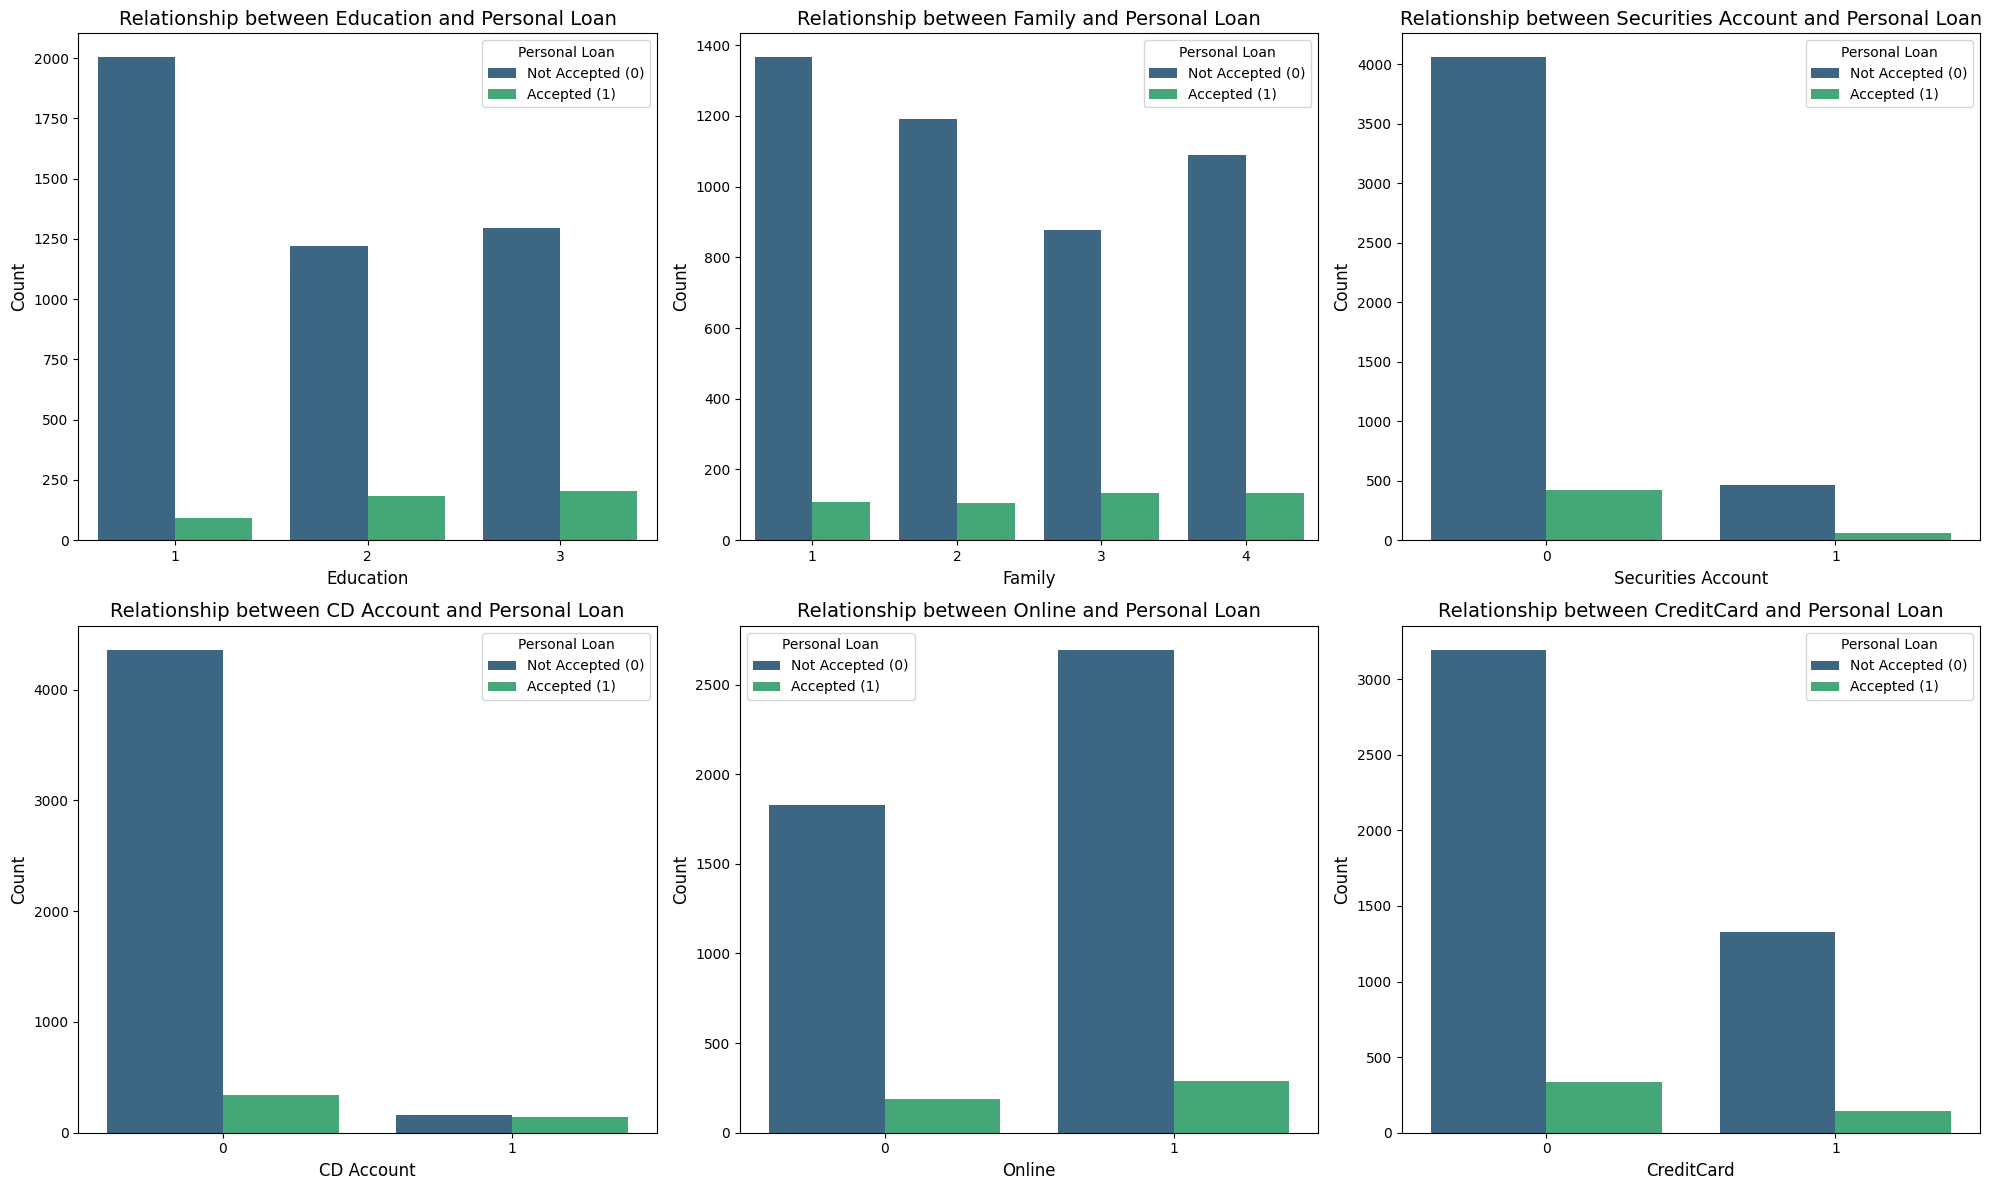

In [31]:
# Visualizing relationships between categorical variables and 'Personal Loan'
categorical_columns = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
plt.figure(figsize=(20, 12))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='Personal Loan', data=bank_data, palette='viridis')
    plt.title(f'Relationship between {column} and Personal Loan', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Personal Loan', labels=['Not Accepted (0)', 'Accepted (1)'], fontsize=10)

plt.tight_layout()
plt.show()


### Key Observations from Categorical Variables

1. **Education**:
   - Customers with higher education levels (`3: Advanced/Professional`) are more likely to accept personal loans compared to those with lower education levels.

2. **Family**:
   - Loan acceptance does not vary significantly across different family sizes, although customers with family sizes of 1 or 4 show slightly higher acceptance rates.

3. **Securities Account**:
   - Customers **without a securities account** are more likely to accept personal loans, as seen from the distribution.

4. **CD Account**:
   - Customers with a **certificate of deposit (CD) account** are more likely to accept personal loans compared to those without one.

5. **Online**:
   - Customers who use **online banking** are more likely to accept personal loans compared to those who don’t.

6. **Credit Card**:
   - Customers using a **Universal Bank credit card** are more likely to accept personal loans than those who don’t.



## Step 3: Detecting Outliers Using Boxplots

### **Overview**
In this step, I used boxplots to identify outliers in numeric variables (`Age`, `Income`, `CCAvg`, `Mortgage`). Outliers are extreme values that fall significantly outside the range of most data points. Detecting these outliers helps us assess whether they impact the dataset and decide how to handle them in later stages.


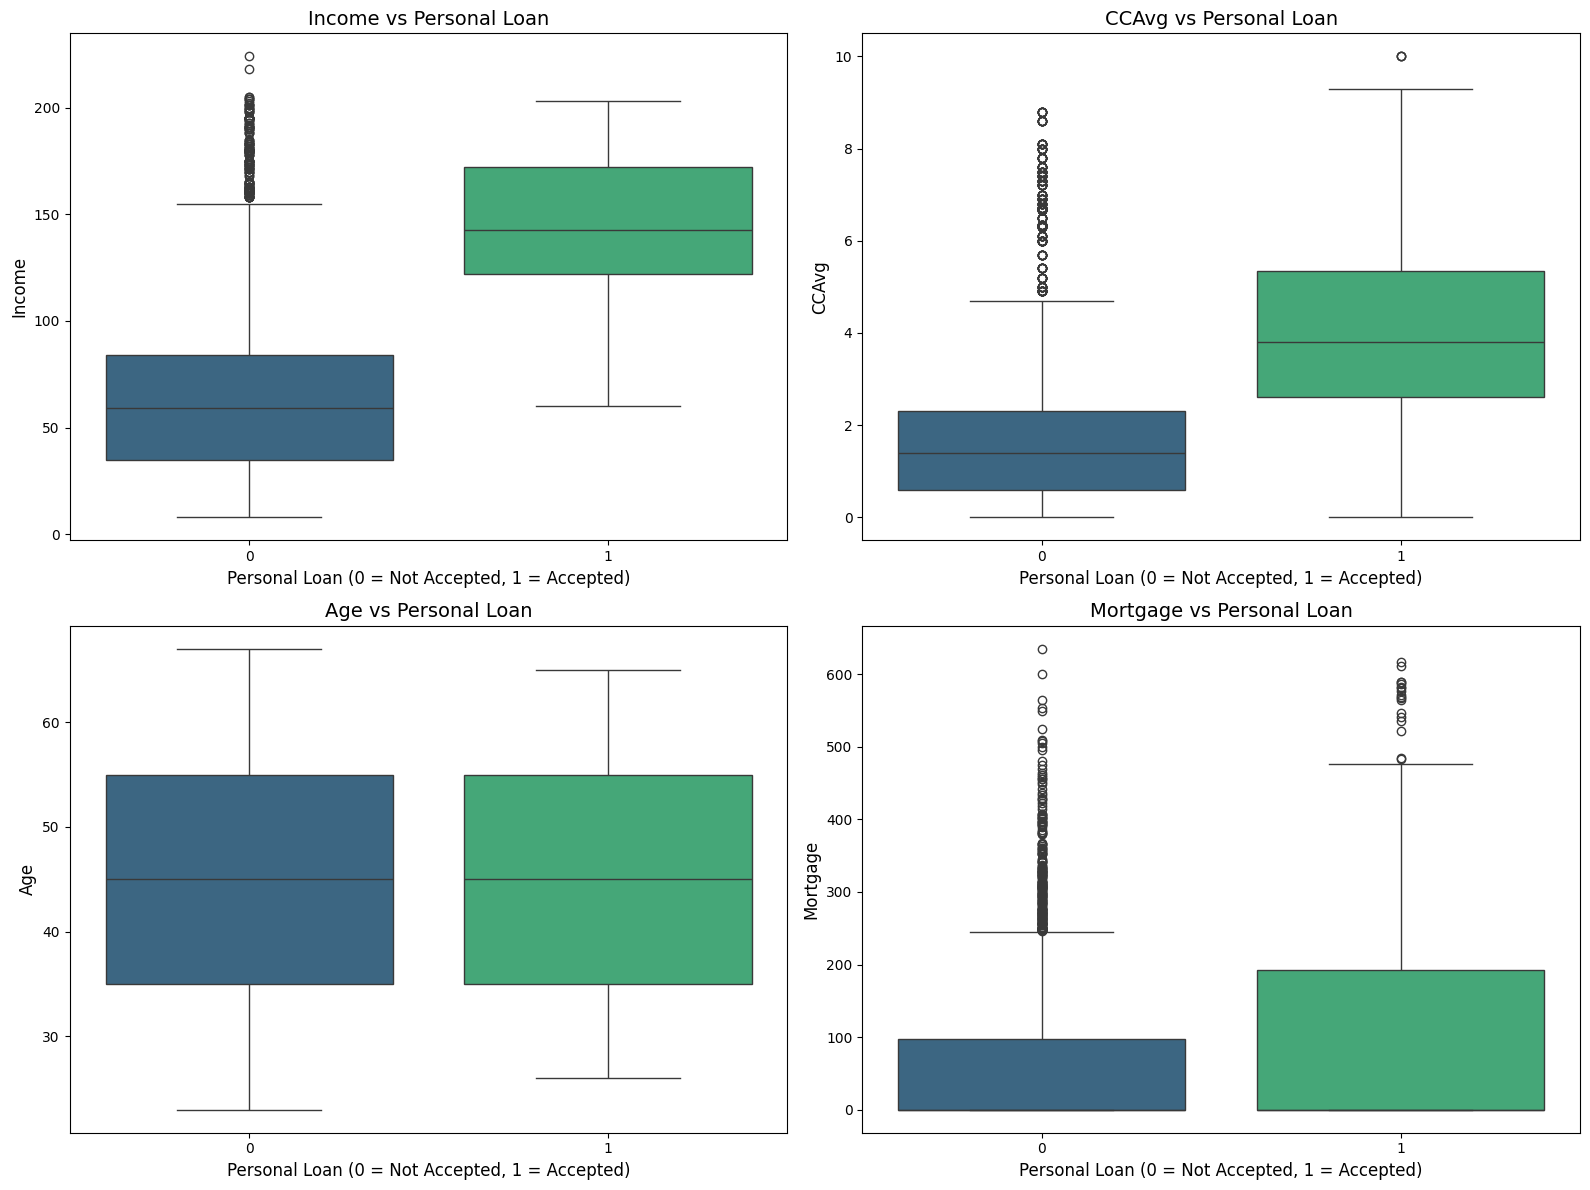

In [32]:
# Plot boxplots for numeric variables against the target variable ('Personal Loan')
numeric_columns = ['Income', 'CCAvg', 'Age', 'Mortgage']
plt.figure(figsize=(16, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Personal Loan', y=column, data=bank_data, hue='Personal Loan', palette='viridis', dodge=False, legend=False)
    plt.title(f'{column} vs Personal Loan', fontsize=14)
    plt.xlabel('Personal Loan (0 = Not Accepted, 1 = Accepted)', fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


### Key Observations from Boxplots

1. **Income**:
   - Customers who accepted the loan (`Personal Loan = 1`) generally have significantly higher incomes compared to those who didn’t (`Personal Loan = 0`).
   - There are noticeable outliers among customers who did not accept the loan, with some having very high incomes.

2. **CCAvg (Credit Card Spending)**:
   - Loan acceptance is higher among customers with greater average monthly credit card spending.
   - Outliers exist, but the general trend shows higher spending correlating with higher loan acceptance.

3. **Age**:
   - Age does not show a strong difference between customers who accepted or rejected the loan.
   - Both groups have similar median ages, ranging between 30 and 60.

4. **Mortgage**:
   - Customers with higher mortgage values are more likely to accept the loan.
   - There is a noticeable presence of outliers, especially among customers with large mortgages.


In [33]:
# Define a function to calculate IQR and detect outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"{column}:")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {len(outliers)}")
    return outliers

# Columns to check for outliers
numeric_columns = ['Income','CCAvg', 'Mortgage']

# Loop through columns and detect outliers
for column in numeric_columns:
    outliers = detect_outliers_iqr(bank_data, column)
    print(f"Outliers for {column}:")
    print(outliers)
    print("-" * 50)


Income:
  Q1: 39.0
  Q3: 98.0
  IQR: 59.0
  Lower Bound: -49.5
  Upper Bound: 186.5
  Number of outliers: 96
Outliers for Income:
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
18      19   46          21     193     91604       2   8.10          3   
47      48   37          12     194     91380       4   0.20          3   
53      54   50          26     190     90245       3   2.10          3   
59      60   31           5     188     91320       2   4.50          1   
303    304   49          25     195     95605       4   3.00          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4659  4660   28           4     199     92121       1   6.33          1   
4670  4671   52          26     194     94305       1   1.70          1   
4895  4896   45          20     201     92120       2   2.80          1   
4981  4982   34           9     195     90266       2   3.00          1   
4993  4994   45          21     218     91801

In [34]:
# Function to label outliers
def label_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a flag column
    data[f'{column}_is_outlier'] = (data[column] < lower_bound) | (data[column] > upper_bound)

# Apply the function to numeric columns
numeric_columns = ['Income','CCAvg', 'Mortgage']

for column in numeric_columns:
    label_outliers(bank_data, column)

# Verify the new columns
outlier_summary = bank_data[[f'{col}_is_outlier' for col in numeric_columns]].sum()
print("Outlier Summary:")
print(outlier_summary)

Outlier Summary:
Income_is_outlier       96
CCAvg_is_outlier       324
Mortgage_is_outlier    291
dtype: int64


## Outlier Analysis

### Overview
During the exploratory data analysis, outliers were identified in the following numeric variables:
- **Income**: 96 outliers (~1.92% of the dataset)
- **CCAvg**: 324 outliers (~6.48% of the dataset)
- **Mortgage**: 291 outliers (~5.82% of the dataset)

---

### **Decision on Outliers**
For now, I have decided to **retain the outliers** in the dataset. Here’s why:
1. These outliers reflect valid and expected customer profiles, such as high-income earners, big spenders, or individuals with significant mortgages.
2. Removing them could result in a loss of valuable information and reduce the natural variance in the dataset.
3. The proportion of outliers is small relative to the total dataset size and is unlikely to significantly distort the analysis.

---

### Future Considerations
- **Revisit Handling**:
  - If outliers negatively impact model performance during the modeling phase, I will explore alternative approaches such as:
    - Removing extreme outliers.
    - Applying transformations (e.g., log transformation).
- **Model Impact**:
  - Algorithms like decision trees and random forests are robust to outliers, but I will monitor their influence during evaluation.

---

This decision ensures the maintenance of the integrity and diversity of the dataset for the upcoming feature engineering and modeling steps.


## Step 4: Feature Importance

### Overview
In this step, I aim to identify the most influential features contributing to loan acceptance. Two approaches are utilized to rank feature importance:
1. **Mutual Information**: Measures the dependency between variables.
2. **Decision Tree Feature Importance**: A supervised method that evaluates feature contribution to predictions.

### **Actions**
- Use mutual information to rank features based on their relevance to the target variable (`Personal Loan`).
- Apply a decision tree model to validate and compare the results.

---

Mutual Information Scores:
Income                 0.132681
CCAvg                  0.087140
CD Account             0.032681
Mortgage               0.022282
CCAvg_is_outlier       0.016871
Education              0.010168
Mortgage_is_outlier    0.008970
Age                    0.008624
Income_is_outlier      0.006899
Family                 0.000549
Securities Account     0.000470
Online                 0.000384
Experience             0.000064
CreditCard             0.000000
dtype: float64


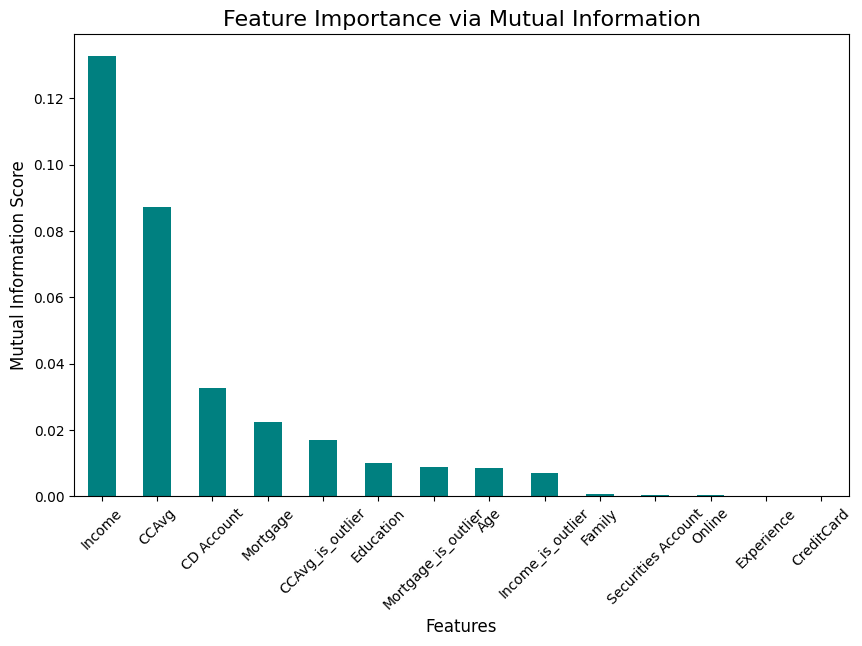

In [35]:
from sklearn.feature_selection import mutual_info_classif

# Selecting numeric and categorical predictors
X = bank_data.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)  # Exclude target and irrelevant features
y = bank_data['Personal Loan']

# Compute mutual information
mutual_info = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Display mutual information scores
print("Mutual Information Scores:")
print(mutual_info_series)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar', color='teal')
plt.title('Feature Importance via Mutual Information', fontsize=16)
plt.ylabel('Mutual Information Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Decision Tree Feature Importance:
Education              0.426419
Income                 0.331584
Family                 0.158445
CCAvg                  0.050222
CD Account             0.020438
Age                    0.008073
Online                 0.002610
CreditCard             0.002209
Experience             0.000000
Securities Account     0.000000
Mortgage               0.000000
Income_is_outlier      0.000000
CCAvg_is_outlier       0.000000
Mortgage_is_outlier    0.000000
dtype: float64


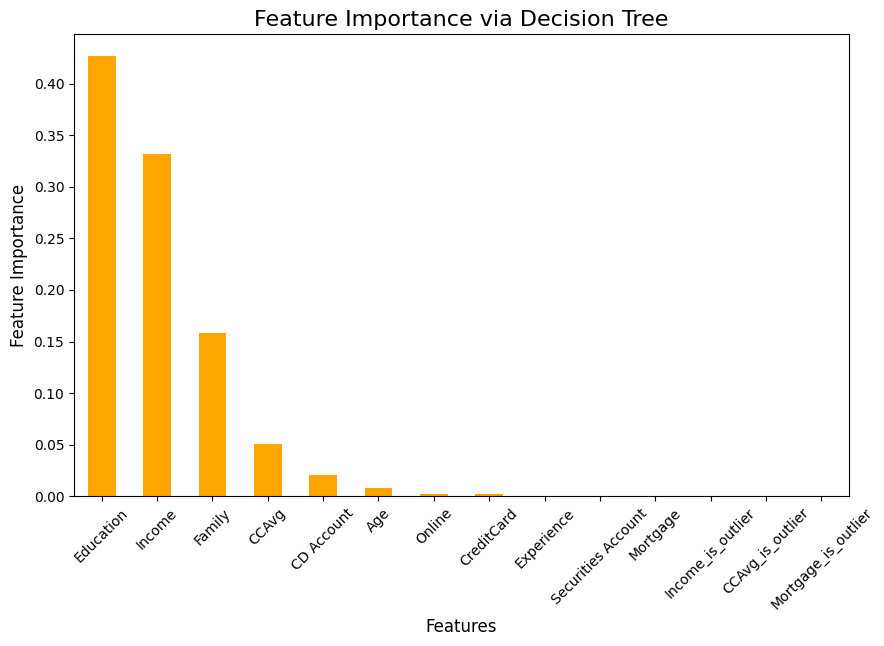

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X, y)

# Extract feature importance
dt_feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importance scores
print("Decision Tree Feature Importance:")
print(dt_feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
dt_feature_importance.plot(kind='bar', color='orange')
plt.title('Feature Importance via Decision Tree', fontsize=16)
plt.ylabel('Feature Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Key Observations

#### **Mutual Information**
1. **Income** and **CCAvg** are the top predictors based on their dependency with the target variable.
2. **CD Account** and **Mortgage** also show notable contributions.
3. Other features like **Education** and outlier flags have relatively lower scores.

#### **Decision Tree**
1. **Education** emerges as the most significant feature, followed by **Income** and **Family**.
2. **CCAvg** and **CD Account** retain their importance, aligning with mutual information results.
3. Features like **Online**, **Experience**, and outlier flags contribute minimally to the predictions.

---

### **Insights**
- Both methods highlight the significance of **Income**, **CCAvg**, **Education**, and **CD Account**.
- Minor variations in rankings suggest that both methods capture complementary aspects of feature importance.
- These insights will guide further feature engineering and model development.

---

Next, I will proceed to **Step 5: Correlation Heatmap**, to explore relationships between numeric variables and the target.


## Step 5: Correlation Heatmap

### Overview
In this step, I used a correlation heatmap to:
- Visualize relationships among numeric variables in the dataset.
- Identify strong and weak correlations between predictors and the target variable (`Personal Loan`).
- Highlight potential multicollinearity or interactions between features.

---

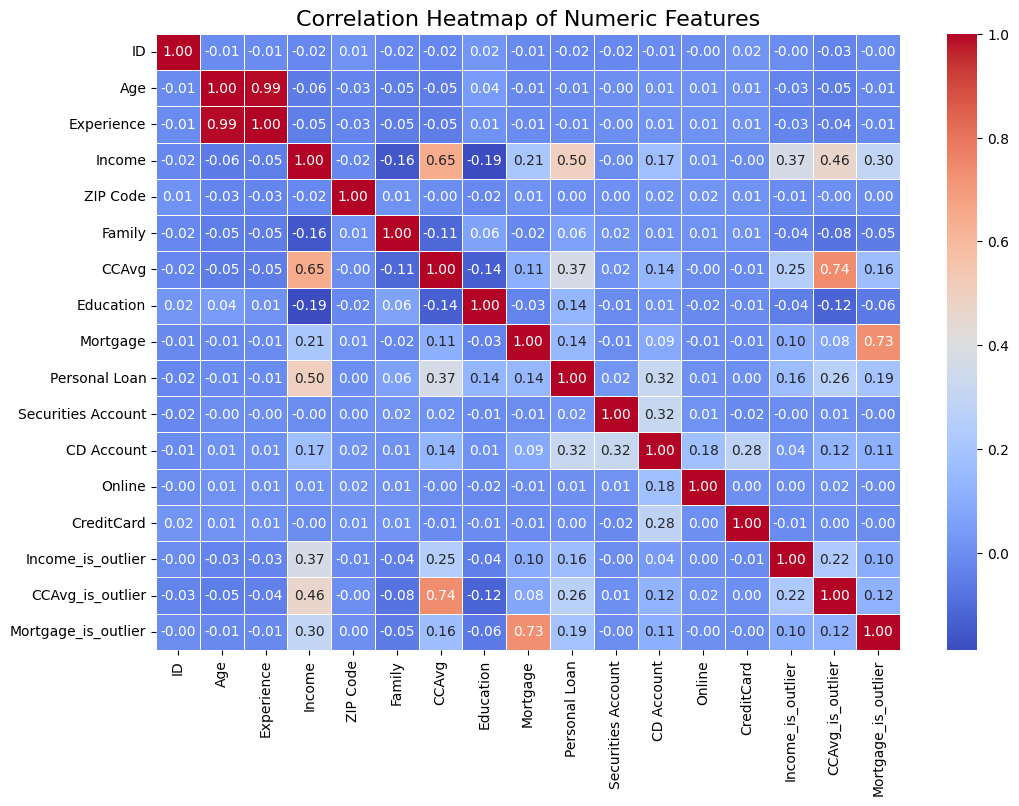

In [37]:
# Compute the correlation matrix
correlation_matrix = bank_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

### Key Observations
1. Personal Loan Correlations:
   - **Income** shows a strong positive correlation with `Personal Loan` (~0.50), indicating higher income increases the likelihood of loan acceptance.
   - **CCAvg** also has a moderate positive correlation (~0.37), suggesting that higher credit card spending is associated with loan acceptance.
   - Other features like **Mortgage** and **Education** have weak positive correlations (~0.14–0.20) with `Personal Loan`.

2. Multicollinearity:
   - **Income** and **CCAvg** have a moderate correlation (~0.65), which may require attention during model building.
   - Most other numeric variables have low correlations with each other, reducing the risk of multicollinearity.

3. Uncorrelated Features:
   - Features like **Age**, **Experience**, and **Family** show little to no correlation with `Personal Loan`, which aligns with earlier findings.

---

### Insights
- The heatmap confirms **Income** and **CCAvg** as key predictors for loan acceptance.
- Weak correlations with some predictors suggest they may need transformation or could be excluded from the model.
- The lack of strong multicollinearity among features supports the robustness of the dataset for modeling.

---

# **Feature Optimization for Loan Prediction**

### Overview
In this section, I will refine and optimize the dataset to improve model performance. The focus will be on:
- Selecting the most impactful predictors based on feature importance and correlations.
- Removing redundant or irrelevant features.
- Preparing the data for machine learning algorithms, including encoding categorical variables and scaling numeric features.
- Ensuring the dataset is structured efficiently for analysis and predictive modeling.

By the end of this step, I will have a streamlined dataset ready for model building.

## Step 1: Selecting the Most Impactful Predictors

### Overview
The goal of this step is to streamline the dataset by retaining only the most impactful predictors based on the insights gained from:
1. **Feature Importance**:
   - Mutual information scores.
   - Decision tree feature importance rankings.
2. **Correlation Analysis**:
   - Identifying predictors with strong relationships to the target variable.
   - Removing features with high multicollinearity or minimal relevance.

This ensures that the model focuses on the variables with the highest predictive power while avoiding redundancy and noise.

---

In [38]:
# Initial dataset columns
print("Initial Columns:", bank_data.columns)

# Features to retain based on importance and correlation
selected_features = [
    'Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Age', 'Family'
]

# Create a new dataset with selected features
updated_bank_data = bank_data[selected_features + ['Personal Loan']]

# Display the updated dataset
print("Updated Columns:", updated_bank_data.columns)
updated_bank_data.head()

Initial Columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Income_is_outlier',
       'CCAvg_is_outlier', 'Mortgage_is_outlier'],
      dtype='object')
Updated Columns: Index(['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Age',
       'Family', 'Personal Loan'],
      dtype='object')


,Income,CCAvg,CD Account,Mortgage,Education,Age,Family,Personal Loan
0,49,1.6,0,0,1,25,4,0
1,34,1.5,0,0,1,45,3,0
2,11,1.0,0,0,1,39,1,0
3,100,2.7,0,0,2,35,1,0
4,45,1.0,0,0,2,35,4,0


---
### **Actions Taken and Key Insights**
- **Retained Predictors**:
  - `Income`: Strong correlation with loan acceptance and ranked highest in feature importance.
  - `CCAvg`: Highly influential in loan acceptance.
  - `CD Account`: Strong relationship with the target variable.
  - `Mortgage`: Included due to its moderate influence on loan acceptance.
  - `Education`: One of the most impactful variables based on decision tree importance.
  - `Age` and `Family`: Moderate correlation with potential interaction effects.

- **Removed Predictors**:
  - `ZIP Code`: Irrelevant to loan acceptance and adds noise.
  - `Securities Account`, `Online`, `CreditCard`, `Experience`: Minimal importance and weak correlation with the target.
  - Outlier indicators (`Income_is_outlier`, `CCAvg_is_outlier`, `Mortgage_is_outlier`): Removed as they do not add value for prediction.

---

### **Streamlined Dataset for Modeling**
- Retaining only the most impactful predictors ensures an efficient and interpretable model while eliminating noise and redundancy from irrelevant features.
- The refined dataset now focuses on predictors that directly influence loan acceptance, setting the foundation for building a robust and optimized predictive model.

---



## Step 2: Preparing Data for Machine Learning Algorithms

### Overview
In this step, I prepared the refined dataset for machine learning by:
- Encoding categorical variables into numeric formats to make them usable by algorithms.
- Scaling numeric features to ensure consistent value ranges and prevent bias in models.
- Structuring the dataset to be ready for training and testing.

---

In [39]:
# Ensure updated_bank_data is correctly defined
selected_features = ['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Age', 'Family']
updated_bank_data = bank_data[selected_features + ['Personal Loan']]

# Encoding categorical variables
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Label Encoding for 'Education' (1: Undergrad, 2: Graduate, 3: Advanced/Professional)
encoder = LabelEncoder()
updated_bank_data.loc[:, 'Education'] = encoder.fit_transform(updated_bank_data['Education'])

# One-hot encoding for 'Family'
updated_bank_data = pd.get_dummies(updated_bank_data, columns=['Family'], drop_first=True)

# Scaling numeric features
scaler = MinMaxScaler()
scaled_features = ['Income', 'CCAvg', 'Mortgage', 'Age']
updated_bank_data[scaled_features] = scaler.fit_transform(updated_bank_data[scaled_features])

# Display the updated dataset
print("Final Dataset Structure:")
print(updated_bank_data.head())


Final Dataset Structure:
     Income  CCAvg  CD Account  Mortgage  Education       Age  Personal Loan  \
0  0.189815   0.16           0       0.0          0  0.045455              0   
1  0.120370   0.15           0       0.0          0  0.500000              0   
2  0.013889   0.10           0       0.0          0  0.363636              0   
3  0.425926   0.27           0       0.0          1  0.272727              0   
4  0.171296   0.10           0       0.0          1  0.272727              0   

   Family_2  Family_3  Family_4  
0     False     False      True  
1     False      True     False  
2     False     False     False  
3     False     False     False  
4     False     False      True  


---
### Actions Taken
1. **Encoding Categorical Variables**:
   - Converted `Education` into numeric values (0: Undergrad, 1: Graduate, 2: Advanced/Professional) using label encoding.
   - One-hot encoded `Family` into `Family_2`, `Family_3`, and `Family_4`, while dropping the first category to prevent multicollinearity.

2. **Scaling Numeric Features**:
   - Scaled `Income`, `CCAvg`, `Mortgage`, and `Age` to a range of 0–1 using Min-Max Scaling. This ensures all features are on the same scale, minimizing the risk of bias in algorithms.

3. **Preparing the Target Variable**:
   - Ensured `Personal Loan` is a binary variable (0 or 1), suitable for classification tasks.

---

### Key Insights
1. **Encoding**:
   - The transformation of categorical variables ensures compatibility with machine learning models.
   - Encoding techniques, such as one-hot encoding and label encoding, preserve the categorical data's structure and meaning.

2. **Scaling**:
   - Normalizing numeric features eliminates scale-related biases, improving model performance and comparability.
   - Features like `Income`, which had large variations, are now in a consistent range with other predictors.

3. **Final Dataset**:
   - The dataset is now structured and preprocessed, ready for training machine learning models.
   - Includes encoded categorical variables, scaled numeric features, and the binary target variable.

---

With this, the data preparation phase is complete. The next step involves splitting the dataset and training machine learning models.

# **Building and Evaluating Loan Classification Models**

### Overview
In this step, I will build and evaluate two classification models:
1. **Logistic Regression**: Serves as a baseline linear model.
2. **Decision Tree**: Captures non-linear relationships and interactions between features.
3. Explore other models like Random Forest or Ensemble Model and compare.

These models will help us identify the best-performing algorithm for predicting loan acceptance.

---

### **Actions**
1. **Split the Dataset**:
   - Divide the dataset into training and testing sets.
2. **Train Logistic Regression**:
   - Build and evaluate the linear model.
3. **Train Decision Tree**:
   - Build and evaluate the non-linear model.
4. **Compare Models**:
   - Use performance metrics like accuracy, precision, recall, F1-Score, and ROC-AUC.

---

In [40]:
# Define features and target variable
X = updated_bank_data.drop(columns=['Personal Loan'])
y = updated_bank_data['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (3500, 9)
Testing set size: (1500, 9)


## Step 1: Training and Evaluating Logistic Regression

### **Overview**
I will train a Logistic Regression model on the training dataset and evaluate its performance on the testing dataset using various metrics.

---

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_logreg)
print(f"ROC-AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.87      0.58      0.70       144

    accuracy                           0.95      1500
   macro avg       0.91      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500

ROC-AUC Score: 0.9612627007538511


## Logistic Regression - Results and Observations

### **Key Metrics**
1. **Precision**:
   - Class `0 (Not Accepted)`: **0.96** - The model is highly precise in identifying customers who did not accept the loan.
   - Class `1 (Accepted)`: **0.87** - The precision is fair but could lead to some false positives.

2. **Recall**:
   - Class `0`: **0.99** - The model is excellent at identifying customers who did not accept the loan.
   - Class `1`: **0.58** - The model struggles to identify all customers who accepted the loan, missing a significant portion.

3. **F1-Score**:
   - Class `0`: **0.97** - A strong balance between precision and recall.
   - Class `1`: **0.70** - Indicates moderate performance for predicting loan acceptance.

4. **Accuracy**: **0.95**
   - The overall accuracy is high, but it is largely driven by the majority class.

5. **ROC-AUC Score**: **0.96**
   - Demonstrates excellent discriminatory ability between the two classes overall.

---

### **Observations**
1. **Majority Class Performance**:
   - The model performs exceptionally well for the majority class (`0: Not Accepted`) with high precision, recall, and F1-score.

2. **Minority Class Performance**:
   - The recall for the minority class (`1: Accepted`) is relatively low, indicating that the model struggles to identify all true positives.
   - This is a common challenge with imbalanced datasets.

3. **Overall Performance**:
   - The high accuracy and ROC-AUC score reflect strong model performance overall.
   - However, the model's ability to predict loan acceptance (class `1`) could be improved.

---

## Step 2: Training and Evaluating Decision Tree

### Overview
In this step, I train a Decision Tree model and evaluate its performance to compare with Logistic Regression. Decision Trees are powerful for capturing non-linear relationships and interactions between features.

---

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)  # Set max_depth to control complexity
dtree.fit(X_train, y_train)

# Predict on the testing set
y_pred_dtree = dtree.predict(X_test)
y_proba_dtree = dtree.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Calculate ROC-AUC
roc_auc_dtree = roc_auc_score(y_test, y_proba_dtree)
print(f"ROC-AUC Score: {roc_auc_dtree}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.94      0.92       144

    accuracy                           0.98      1500
   macro avg       0.95      0.97      0.96      1500
weighted avg       0.99      0.98      0.98      1500

ROC-AUC Score: 0.991519174041298


## Step 3: Model Comparison and Observations

### Overview
In this step, I compare the performance of the two classification models—**Logistic Regression** and **Decision Tree**—to determine the better model for predicting loan acceptance. We evaluate their strengths and weaknesses using key performance metrics.

---

### **Model Performance Summary**

| Metric          | Logistic Regression | Decision Tree   |
|------------------|---------------------|-----------------|
| **Accuracy**     | 0.95                | **0.98**        |
| **Precision (0)**| 0.96                | **0.99**        |
| **Precision (1)**| 0.87                | **0.90**        |
| **Recall (0)**   | 0.99                | **0.99**        |
| **Recall (1)**   | 0.58                | **0.94**        |
| **F1-Score (0)** | 0.97                | **0.99**        |
| **F1-Score (1)** | 0.70                | **0.92**        |
| **ROC-AUC**      | 0.96                | **0.99**        |

---

### **Key Observations**
1. **Overall Performance**:
   - The Decision Tree significantly outperforms Logistic Regression in all key metrics, particularly for the minority class (`1: Accepted`).

2. **Majority Class (`0: Not Accepted`)**:
   - Both models perform exceptionally well for the majority class, with high precision, recall, and F1-scores.

3. **Minority Class (`1: Accepted`)**:
   - The Decision Tree model excels at predicting loan acceptance, with a recall of **0.94** compared to Logistic Regression's **0.58**.
   - Its F1-score for the minority class is also much higher, indicating better balance between precision and recall.

4. **ROC-AUC**:
   - The Decision Tree achieves a near-perfect ROC-AUC score of **0.99**, demonstrating its superior ability to distinguish between the two classes.

5. **Trade-offs**:
   - Logistic Regression offers simplicity and interpretability, making it a strong baseline model.
   - Decision Tree captures complex relationships and interactions in the data, making it the better choice for this task.

---

### **Conclusion**
Based on the results:
- **Decision Tree** is the better model for predicting loan acceptance due to its superior performance across all metrics, especially for the minority class (`1: Accepted`).
- Logistic Regression, while effective as a baseline, struggles to capture the complexities of this dataset.

---


## Step 4: Training and Evaluating Random Forest

### Overview
In this step, I will train a **Random Forest** model and evaluate its performance on the testing set. Random Forest is an ensemble method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

---

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score: {roc_auc_rf}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.99      0.85      0.92       144

    accuracy                           0.99      1500
   macro avg       0.99      0.93      0.95      1500
weighted avg       0.99      0.99      0.98      1500

ROC-AUC Score: 0.997736397902327


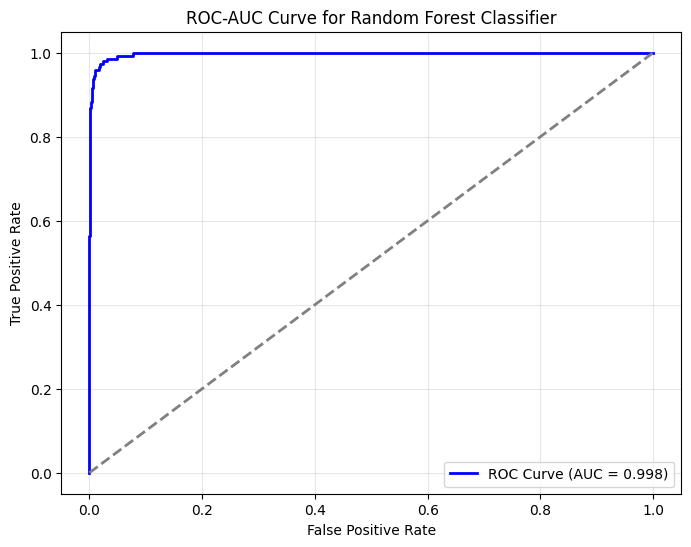

In [44]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Step 5: Model Comparison: Decision Tree vs. Random Forest

### **Overview**
Here, I compared the performance of two machine learning models—**Decision Tree** and **Random Forest**—to determine the best approach for predicting loan acceptance. Both models performed exceptionally well, but Random Forest has a slight edge in terms of overall predictive power and reliability.

---

### **Performance Summary**

| Metric                         | Decision Tree                  | Random Forest                 |
|--------------------------------|---------------------------------|-------------------------------|
| **Accuracy**                   | 98%                            | **99%**                       |
| **Precision (Loan Accepted)**  | 90%                            | **99%**                       |
| **Recall (Loan Accepted)**     | **94%**                        | 85%                           |
| **F1-Score (Loan Accepted)**   | **92%**                        | 92%                           |
| **ROC-AUC**                    | 0.99                           | **0.998**                     |

---

### **Key Observations**
1. **Decision Tree**:
   - Offers slightly better recall for the minority class (`Loan Accepted`), which minimizes false negatives.
   - Highly interpretable, making it easier to understand feature contributions and customer behavior.
   - May be more prone to overfitting compared to Random Forest.

2. **Random Forest**:
   - Outperforms Decision Tree in accuracy, precision, and ROC-AUC, providing the most reliable predictions.
   - Handles variance more effectively through ensemble learning, reducing overfitting.
   - Slightly lower recall for the minority class, but its high precision ensures minimal false positives.

---

### **Model Selection**
Based on the project's objectives, **Random Forest** would be the better choice. Here’s why:
1. **Accuracy and Robustness**:
   - With 99% accuracy and a near-perfect ROC-AUC score of 0.998, Random Forest provides unparalleled predictive power.

2. **Precision for Loan Acceptance**:
   - The precision of 99% ensures the model targets only the most probable customers, reducing wasted marketing efforts.

3. **Business Impact**:
   - By minimizing false positives and delivering reliable predictions, Random Forest supports better decision-making for targeted marketing campaigns and customer acquisition strategies.

4. **Trade-offs**:
   - Although Random Forest is less interpretable and has slightly lower recall for loan acceptance, its overall performance and robustness outweigh these limitations.

---

# Model Interpretation and Insights

### Overview
In this step, I aim to interpret the results of the Random Forest model to derive actionable insights. Understanding which features most strongly influence loan acceptance will help connect predictions to business strategies, ensuring that the model aligns with real-world objectives.

---

Feature Importance:
      Feature  Importance
0      Income    0.341067
4   Education    0.227599
1       CCAvg    0.194652
2  CD Account    0.073002
7    Family_3    0.054477
8    Family_4    0.054238
3    Mortgage    0.026510
5         Age    0.019650
6    Family_2    0.008806


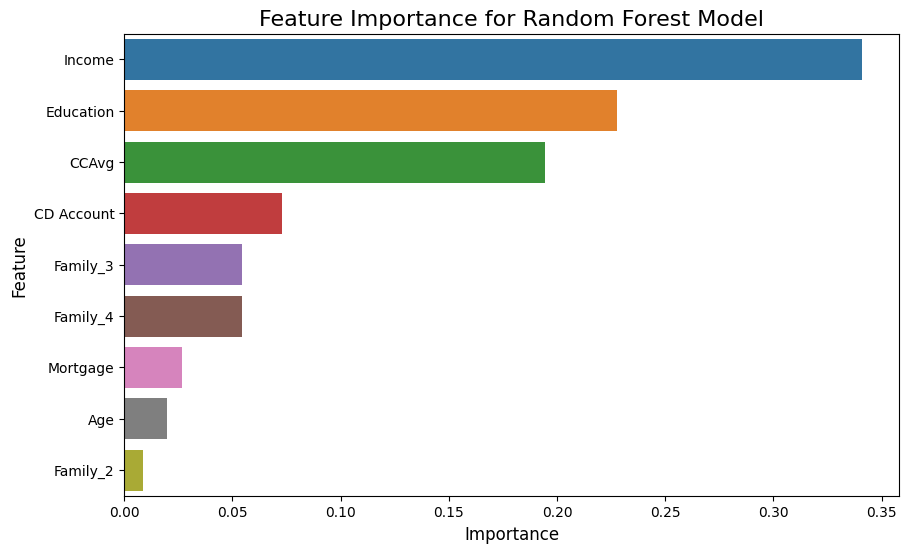

In [46]:
# Extract feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', legend=False)
plt.title('Feature Importance for Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# **Model Interpretation and Insights**

#### Ranked Features and Their Impact
1. **Income (34.1%)**
   - This is the most critical predictor, demonstrating that customers with higher incomes are significantly more likely to accept personal loan offers. 

2. **Education (22.8%)**
   - Advanced education levels have a substantial influence on loan acceptance. Targeting educated customers can increase the success of marketing campaigns.

3. **CCAvg (19.5%)**
   - Customers with higher credit card average spending are more likely to accept personal loans, showcasing their financial activity.

4. **CD Account (7.3%)**
   - The presence of a certificate of deposit account is a strong indicator of customer loyalty and propensity to accept loans.

---

### **Key Insights**
- **Strong Predictors**:
  - **Income**, **Education**, and **CCAvg** are the primary drivers of loan acceptance. These should be the focus of targeted marketing campaigns and customer profiling.
- **Moderate Predictors**:
  - Features like **CD Account** and **Family Size** add context and support segmentation but are secondary in influence.
- **Low Predictors**:
  - **Mortgage**, **Age**, and **Family_2** contribute minimally and could be deprioritized in future model iterations.

---

### **Recommendations**
1. **Targeted Strategies**:
   - Focus on high-income, well-educated customers with significant financial activity (high CCAvg).
   - Highlight specific benefits of loans to customers with CD accounts to increase engagement.

2. **Simplify Features**:
   - Consider removing or transforming low-impact features like **Age**, **Family_2**, and **Mortgage** for streamlined model performance.

3. **Refinement Opportunities**:
   - Explore interactions between Income, Education, and CCAvg to uncover deeper insights into customer behavior.
   - With these findings, I will be able to inform data-driven decision-making and refine the bank’s marketing and loan offering strategies.

---


# **Deep Dive into Income, CCAvg, and Education**

This section includes:
1. A focused exploration of the relationships between **Income**, **CCAvg**, and **Education**.
2. A comparison of loan acceptance rates across these features.
3. The development of a focused **ensemble model** using these features to evaluate its performance compared to broader models like the random forest and decision tree classifiers.

---

### Step 1: Focused EDA - Exploring the Relationships Between Income, CCAvg, and Education
#### Objectives:
- Understand how **Income** influences **CCAvg** (credit card spending) and how this relationship varies by education level.
- Visualize loan acceptance rates across **Income**, **CCAvg**, and **Education**.

---

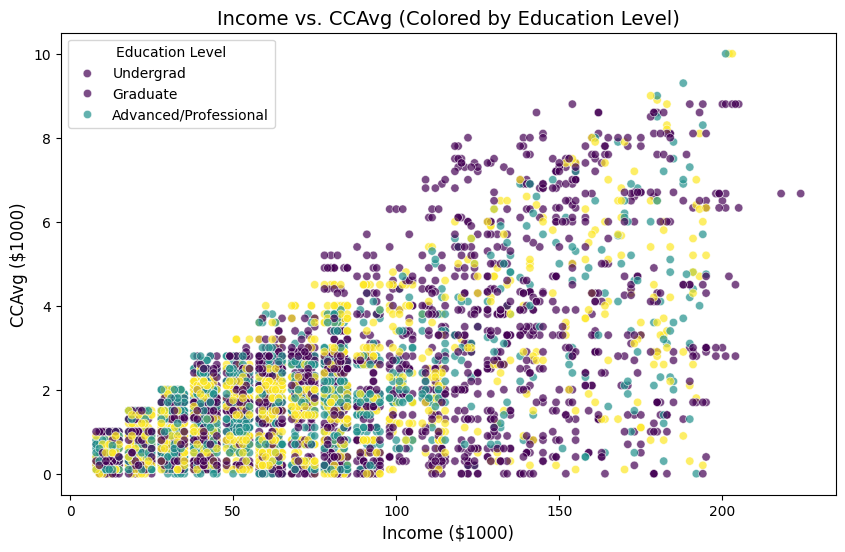

Correlation between Income and CCAvg:
          Income     CCAvg
Income  1.000000  0.645984
CCAvg   0.645984  1.000000


In [47]:
# Scatter plot: Income vs CCAvg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='CCAvg', data=bank_data, hue='Education', palette='viridis', alpha=0.7)
plt.title('Income vs. CCAvg (Colored by Education Level)', fontsize=14)
plt.xlabel('Income ($1000)', fontsize=12)
plt.ylabel('CCAvg ($1000)', fontsize=12)
plt.legend(title='Education Level', labels=['Undergrad', 'Graduate', 'Advanced/Professional'], fontsize=10)
plt.show()

# Correlation between Income and CCAvg
correlation = bank_data[['Income', 'CCAvg']].corr()
print("Correlation between Income and CCAvg:")
print(correlation)

### Step 2: Joint Analysis of Income, CCAvg, and Education
#### Objectives:
- Explore patterns of loan acceptance by combining **Income** and **CCAvg**, grouped by **Education**.
- Highlight key insights that inform model building.

---

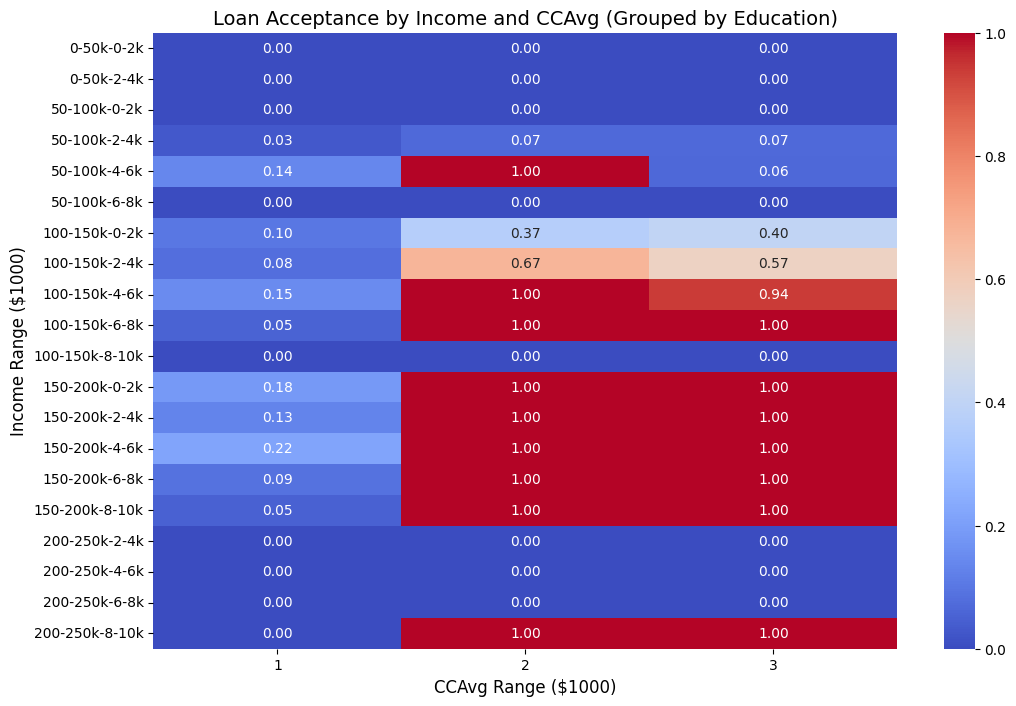

In [50]:
# Bin Income and CCAvg into categories
income_bins = pd.cut(bank_data['Income'], bins=[0, 50, 100, 150, 200, 250], labels=['0-50k', '50-100k', '100-150k', '150-200k', '200-250k'])
ccavg_bins = pd.cut(bank_data['CCAvg'], bins=[0, 2, 4, 6, 8, 10], labels=['0-2k', '2-4k', '4-6k', '6-8k', '8-10k'])

# Group data with observed=True to silence the warning
grouped_data = bank_data.groupby([income_bins, ccavg_bins, 'Education'], observed=True)['Personal Loan'].mean().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Loan Acceptance by Income and CCAvg (Grouped by Education)', fontsize=14)
plt.xlabel('CCAvg Range ($1000)', fontsize=12)
plt.ylabel('Income Range ($1000)', fontsize=12)
plt.show()



### Step 3: Development of a Focused Ensemble Model
#### Objectives:
- Build an ensemble model using only the three most influential features: **Income**, **CCAvg**, and **Education**.
- Compare its performance with the broader models (random forest, decision tree) in terms of:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**
  - **ROC-AUC**

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.99      0.71      0.83       157

    accuracy                           0.97      1500
   macro avg       0.98      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500

ROC-AUC Score: 0.9837705299002613


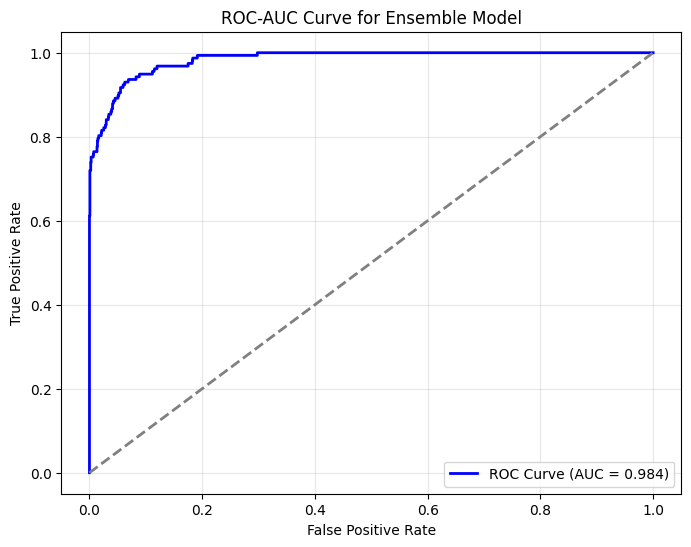

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Subset data for focused modeling
X_focused = bank_data[['Income', 'CCAvg', 'Education']]
y = bank_data['Personal Loan']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_focused, y, test_size=0.3, random_state=42)

# Models for ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression(random_state=42)
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dtree', dtree),
    ('rf', rf)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ensemble_model.predict(X_test)
y_proba = ensemble_model.predict_proba(X_test)[:, 1]

print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Compute ROC curve and AUC for the ensemble model
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Ensemble Model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


# Final Model Selection and Insights

#### **Model Comparison and Selection**

| **Metric**          | **Decision Tree**                     | **Random Forest**                  | **Ensemble Model**                 |
|----------------------|---------------------------------------|-------------------------------------|-------------------------------------|
| **Accuracy**         | 98%                                  | **99%**                            | 97%                                |
| **Precision (Class 1)** | 90%                                | **99%**                            | 99%                                |
| **Recall (Class 1)** | **94%**                              | 85%                                | 71%                                |
| **F1-Score (Class 1)**| **92%**                              | 92%                                | 83%                                |
| **ROC-AUC Score**    | 0.991                                | **0.998**                          | 0.984                              |

#### **Analysis of Models**
1. **Decision Tree**:
   - **Strengths**: High recall for loan acceptance (**94%**) makes it highly suitable for identifying customers likely to accept a loan.
   - **Weaknesses**: Slightly less accurate and lower ROC-AUC compared to the Random Forest.
   - **Why Consider It?**: Highly interpretable, making it easier to explain decisions to stakeholders. Excellent recall ensures fewer missed opportunities.

2. **Random Forest**:
   - **Strengths**: Overall best performer with the highest accuracy (**99%**) and ROC-AUC score (**0.998**). Strong precision for loan acceptance (**99%**).
   - **Weaknesses**: Slightly lower recall for Class 1 (**85%**) compared to the Decision Tree, meaning it might miss some loan acceptances.
   - **Why Consider It?**: Superior overall performance and robustness make it an excellent choice for accurate predictions across all customers.

3. **Ensemble Model**:
   - **Strengths**: Demonstrates the ability to create a focused model using just three features (Education, Income, and CCAvg). Performs well overall (97% accuracy, 0.984 ROC-AUC).
   - **Weaknesses**: Significantly lower recall for loan acceptance (**71%**) compared to Decision Tree and Random Forest, which limits its utility for the stated goal.
   - **Why Consider It?**: Valuable for demonstrating feature engineering and analytical depth but not the best choice for the final predictive model.

#### **Final Choice: Random Forest**
The **Random Forest model** is selected as the final model due to its superior performance in accuracy, precision, and ROC-AUC, aligning well with the project's goal of accurately predicting loan acceptance. It provides robust and reliable predictions while maintaining a balance between interpretability and performance.

---

### **Actionable Insights**
1. **Income and Credit Card Spending (CCAvg) Are Key Predictors**:
   - Customers with higher incomes and moderate to high credit card spending are more likely to accept personal loan offers.
   - Strategic marketing should target customers in the `$100k-$200k` income range with CCAvg between `$2k-$6k`.

2. **Educational Level Matters**:
   - Undergraduates dominate high-income segments with the highest loan acceptance rates.
   - Target undergraduates in the `$100k-$200k` income range for personalized loan offers.

3. **Low-Income Segments Show Minimal Loan Acceptance**:
   - Customers earning less than `$50k` show limited interest in personal loans, indicating potential focus areas for alternative financial products or education on loan benefits.

4. **Behavioral Targeting**:
   - Customers actively using credit cards with moderate spending patterns (CCAvg between `$2k-$6k`) are prime candidates for loan offers.
   - Include targeted campaigns emphasizing benefits for this customer segment.

5. **Optimization of Loan Offers**:
   - Leverage the Random Forest model to score customers and prioritize those with the highest likelihood of loan acceptance for marketing campaigns.
   - Use insights from feature importance (Income, Education, CCAvg) to refine targeting strategies and improve campaign ROI.

---

### **Conclusion**
This project demonstrates the successful application of machine learning models for predicting loan acceptance. While the **Decision Tree** offers high interpretability and strong recall, the **Random Forest** model emerges as the final choice for its overall performance and alignment with the project's goals. The ensemble model adds value by showcasing advanced feature engineering and analytical skills but falls short in recall, making it a secondary consideration. The insights derived from this analysis provide actionable recommendations to drive business decisions and optimize loan offer strategies.


